For this project, you will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Your goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

# Importing Libraries


In [2]:
# basics
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#warning
import warnings
warnings.filterwarnings('ignore')

#setting notebook style
sns.set_style('darkgrid')

In [3]:
experiment= pd.read_csv('ab_test.csv')
experiment.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [4]:
countries=pd.read_csv('countries_ab.csv')
countries

,id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


In [5]:
print('Shape of experiment dataset:', experiment.shape)
print('Shape of countries dataset:', countries.shape)

Shape of experiment dataset: (294478, 5)
Shape of countries dataset: (290584, 2)


In [6]:
print(experiment.info())
print('===========================================')
print(countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB
None


experiment dataset:

- It contains 294,478 rows and 5 columns.
- There are no missing values in any of the columns, as indicated by the "Non-Null Count" values for each column.
- The 'id', 'con_treat', and 'page' columns are stored as objects (strings), while the 'time' and 'converted' columns are stored as integers.
- The memory usage of the data frame is 11.2+ MB.

countries dataset:

- It contains 290,584 rows and 2 columns.
- There are no missing values in any of the columns.
- The 'id' column is stored as an integer, while the 'country' column is stored as an object (string).
- The memory usage of the data frame is 4.4+ MB.

In [7]:
experiment.describe()

,id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


From the mean of the converted column, we can say that around 12% users are converted

In [8]:
print(experiment.describe(include='O'))
print('===============================')
print(countries.describe(include='O'))

           time  con_treat      page
count    294478     294478    294478
unique    35993          2         2
top     36:26.7  treatment  old_page
freq         22     147276    147239
       country
count   290584
unique       3
top         US
freq    203619


experiment dataser:

- The 'time' column has 35,993 unique values, which could indicate that the data was collected over a period of time.
- The 'con_treat' column has only two unique values, indicating that the experiment was a simple A/B test.
- The 'page' column also has two unique values, indicating that there were two versions of the landing page.
- The 'top' value of the 'con_treat' column is 'treatment', which occurred 147,276 times.
- The 'top' value of the 'page' column is 'old_page', which occurred 147,239 times.


countries dataset:

- The 'country' column is a categorical column.
- There are 290,584 rows in the 'country' column, indicating that there are 3,894 missing values.
- The 'top' value of the 'country' column is 'US', which occurred 203,619 times.

In [9]:
# checking unique values

print('Unique values in con_treat column are:')
print(list(experiment['con_treat'].unique()))
print('Number of unique values:', len(list(experiment['con_treat'].unique())))
print('===============================')
print('Unique values in page column are:')
print(list(experiment['page'].unique()))
print('Number of unique values:', len(list(experiment['page'].unique())))
print('===============================')
print('Unique values in country column are:')
print(list(countries['country'].unique()))
print('Number of unique values:', len(list(countries['country'].unique())))

Unique values in con_treat column are:
['control', 'treatment']
Number of unique values: 2
Unique values in page column are:
['old_page', 'new_page']
Number of unique values: 2
Unique values in country column are:
['UK', 'US', 'CA']
Number of unique values: 3


### Merging both dataset

In [10]:
data= experiment.merge(countries, on='id')

In [11]:
print('Shape of experiment dataset:', experiment.shape)
print('Shape of countries dataset:', countries.shape)
print('Shape of merged dataset:',data.shape)

Shape of experiment dataset: (294478, 5)
Shape of countries dataset: (290584, 2)
Shape of merged dataset: (294478, 6)


In [12]:
data.head()

,id,time,con_treat,page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [13]:
#changing time column datatype to datetime format
data['time']=pd.to_datetime(data['time'],format='%M:%S.%f')

# EDA

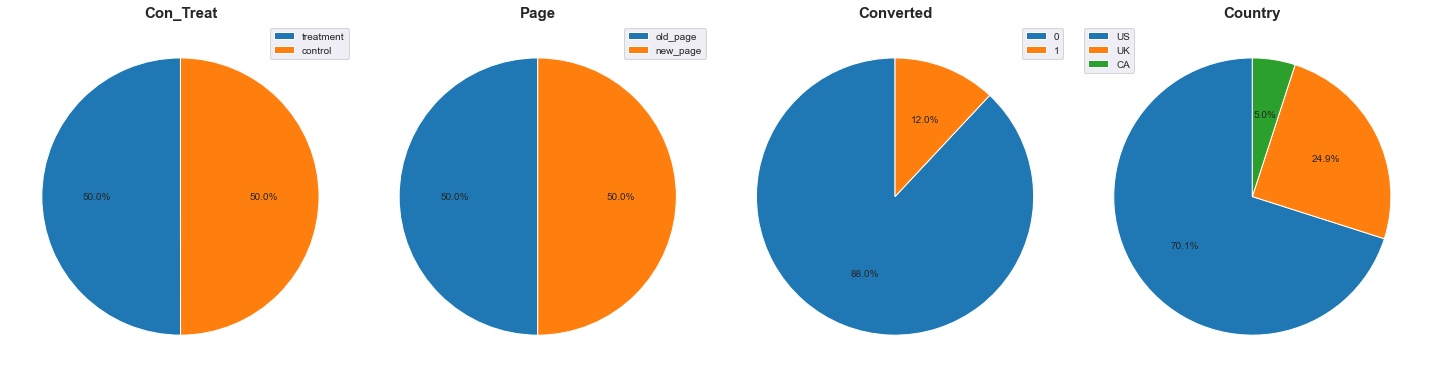

In [14]:
cols = ['con_treat', 'page', 'converted', 'country']
fig, ax = plt.subplots(1,4, figsize=(20, 20))

for col, ax in zip(cols, ax.flatten()):
    ax.pie(data[col].value_counts(), autopct='%1.1f%%', startangle=90)
    ax.legend(labels=data[col].value_counts().index, loc='best')
    ax.set_title(col.title(), fontsize=15, fontweight='bold')

plt.tight_layout()

- There were a total of 147,276 users in the "treatment" group and 147,202 users in the "control" group. Both groups have approximately same proportion.
- For the "page" variable, there were an equal number of users who were shown the "old_page" (147,239) and "new_page" (147,239).
- The majority of users (259,241) did not convert, while 35,237 users did convert.
- Around 70% of users are from USA followed by UK (25%). Least number of users were from Canada (14,695).

# A/B Testing

### Introduction:

- The purpose of this A/B testing project is to compare the performance of the current website landing page (old_page) with a new website landing page (new_page) in terms of conversion rate. 
- A/B testing is a statistical hypothesis testing method that can be used to determine which version of a webpage or application results in the best user experience and higher conversion rates. 
- The goal is to use A/B testing to determine whether the new webpage results in a statistically significant increase in the conversion rate compared to the old webpage.

### Problem Statement:
- The conversion rate of the current website landing page is low, and there is a need to improve it to increase sales and revenue. 
- The company has created a new landing page and wants to know if it performs better than the old landing page in terms of conversion rate. 
- The problem statement is to identify whether the new landing page results in a statistically significant increase in the conversion rate compared to the old landing page.

### Scope:
- The scope of this project is to design and conduct an A/B test to determine whether the new landing page results in a statistically significant increase in the conversion rate compared to the old landing page. 
- The test will be conducted on a randomly selected sample of website visitors who will be randomly assigned to either the control group, which will see the old landing page, or the treatment group, which will see the new landing page. 
- The test will run for a sufficient amount of time to collect enough data to draw statistically valid conclusions.

### Challenges:
- One of the main challenges in this project is to ensure that the test is properly designed to avoid bias and ensure statistical validity. 
- Another challenge is to ensure that the sample size is large enough to detect statistically significant differences in the conversion rates. 
- It may also be a challenge to ensure that the test is run for a sufficient amount of time to collect enough data to draw statistically valid conclusions.

### Risks:
- There is a risk that the test may not show a statistically significant difference between the old and new landing pages, which would mean that the company would have invested resources in creating a new landing page without seeing any benefit. 
- There is also a risk that the test may show a statistically significant difference, but the new landing page may not result in a practical improvement in conversion rates.
- Finally, there is a risk that the test may be biased or invalid, resulting in incorrect conclusions being drawn.

# Hypothesis

Based on the user experience research, if the client update the checkout page design, the user sign ups will increase as measured by the conversion rate.

### Null Hypothesis:
The conversion rate for both control and treatment group is same

### Alternative Hypothesis:
The conversion rate for both control and treatment group is different

## Sample Statistics

In [15]:
sample= data.sample(5000)

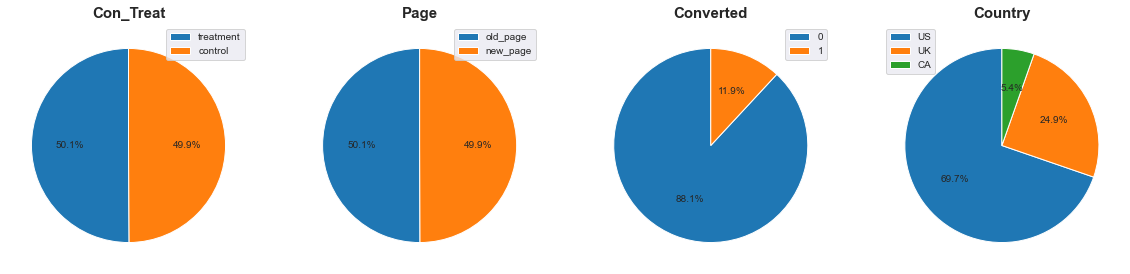

In [16]:
cols = ['con_treat', 'page', 'converted', 'country']
fig, ax = plt.subplots(1,4, figsize=(20, 20))

for col, ax in zip(cols, ax.flatten()):
    ax.pie(sample[col].value_counts(), autopct='%1.1f%%', startangle=90)
    ax.legend(labels=sample[col].value_counts().index, loc='best')
    ax.set_title(col.title(), fontsize=15, fontweight='bold')

In [17]:
sample.head()

,id,time,con_treat,page,converted,country
93802,738517,1900-01-01 00:34:56.200,treatment,new_page,0,US
13996,819171,1900-01-01 00:37:25.300,control,old_page,0,US
178871,696053,1900-01-01 00:36:54.400,treatment,new_page,0,UK
199684,811253,1900-01-01 00:21:52.100,treatment,new_page,0,US
269089,853310,1900-01-01 00:22:07.600,treatment,new_page,0,US


In [20]:
# number of users in each group
n_treatment= sample[sample['con_treat']=='treatment']['converted'].count()
n_control= sample[sample['con_treat']=='control']['converted'].count()
print('Number of Treatment group users:', n_treatment)
print('Number of Control group users:', n_control)

# mean conversion rate of control and treatment groups
p_treatment=sample[sample['con_treat']=='treatment']['converted'].mean()
p_control=sample[sample['con_treat']=='control']['converted'].mean()
print('Mean of Treatment group users:', round(p_treatment,4))
print('Mean of Control group users:', round(p_control,4))

Number of Treatment group users: 2505
Number of Control group users: 2495
Mean of Treatment group users: 0.1178
Mean of Control group users: 0.1202


The number of users in n trials with conversion probability p is Binomially distributed

In [21]:
# plotting distribution
from scipy.stats import binom
x=np.arange(n_treatment*p_treatment-100, n_control*n_control+100)
binom_control=binom.pmf(x, n_control, p_control)
binom_treatment= binom.pmf(x, n_treatment, p_treatment)
plt.bar(x, binom_control, alpha=0.4, label='control')
plt.bar(x, binom_treatment, alpha=0.4, label='treatment')
plt.xlabel('Converted')
plt.ylabel('PMF')
plt.title('PMF of conversion binomial distribution');

KeyboardInterrupt: 